In [1]:
%run ../methodes/support_vector_definition.ipynb import Support_Vector_
import pandas as pd

# On récupère le dataframe d'entraînement stocké en mémoire
%store -r df_train

In [2]:
# La constante multiplicateur (alpha) du terme de régularisation doit être > 0
c_ = np.linspace(1, 10, 10)

In [3]:
# Initialisation des meilleurs paramètres
err_min = 100
support_vector_best_c = -2

In [4]:
# Initialisation des tableaux pour l'analyse des données
df_c_train = pd.Series(0, index=c_)
df_c_test = pd.Series(0, index=c_)

In [5]:
%%capture --no-display
%run utils.ipynb import K_Fold

for c in c_:
            
    # Validation croisée avec K_Fold
    err_train, err_test = K_Fold(10, df_train, Support_Vector_(c))

    # Calcul de l'erreur totale
    err = (err_train + err_test) / 2  

    # On garde les données en mémoire
    df_c_train[c] = err_train
    df_c_test[c] = err_test
                
    # On met à jour les meilleurs paramètres
    if err < err_min:
        err_min = err
        support_vector_best_c = c

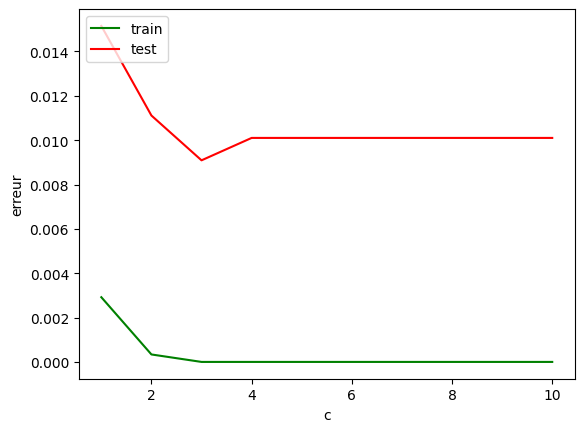

In [6]:
import matplotlib.pyplot as plt
# Représentation graphique

# Evolution de l'erreur moyenne en fonction de alpha
plot_df(df_c_train, df_c_test, 'c', 'index', False)

In [7]:
# On affiche les meilleurs hyperparamètres trouvés
print('err_min : ', err_min, ' | c : ', support_vector_best_c)

err_min :  0.004545454545454545  | c :  3.0


In [8]:
# On stocke en mémoire les meilleurs hyperparamètres trouvés
%store support_vector_best_c

Stored 'support_vector_best_c' (float64)
